# Iris Dataset - SOFENN Example

Demonstrate multi-class classification with SOFENN on classic Iris Dataset

In [1]:
import numpy as np
import random as rnd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import keras
import keras.backend as K

from keras.optimizers import SGD
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input

from sofenn.FuzzyNetwork import FuzzyNetwork
from sofenn.layers.DefuzzyLayer import DefuzzyLayer
from sofenn.layers import FuzzyLayer, NormalizedLayer, WeightedLayer, OutputLayer

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using TensorFlow backend.


## Read in and prep Iris Dataset

In [2]:
# read in iris dataset
iris = datasets.load_iris()
# create one-hot encoded vector for each class
Y = []
for y in iris.target:
    tmp = np.zeros(3)
    tmp[y] = 1
    Y.append(tmp)
Y = np.array(Y)
    
# split to train/test
X_train, X_test, y_train, y_test = train_test_split(iris.data, Y, test_size=0.1)

In [3]:
fuzz = FuzzyNetwork(
            X_train, X_test, y_train, y_test,           # data attributes
            neurons=3, s_init=4, max_neurons=100,       # initialization parameters
            eval_thresh=0.5, ifpart_thresh=0.1354       # evaluation and ifpart threshold
            )

BUILDING SOFNN WITH 3 NEURONS
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Inputs (InputLayer)             (None, 4)            0                                            
__________________________________________________________________________________________________
FuzzyRules (FuzzyLayer)         (None, 3)            24          Inputs[0][0]                     
__________________________________________________________________________________________________
Normalization (NormalizedLayer) (None, 3)            0           FuzzyRules[0][0]                 
__________________________________________________________________________________________________
Weights (WeightedLayer)         (None, 3)            15          Inputs[0][0]                     
                                                                 Normalization[

In [4]:
# loss = 'mean_squared_error'
loss = fuzz.loss_function
optimizer = 'adam'
metrics = ['binary_accuracy']

model = fuzz.model

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)

model.fit(np.array(X_train),
          np.array(y_train),
          epochs=100,
          verbose=1,
          batch_size=2)

Epoch 1/100
135/135 [==============================] - 1s 6ms/step - loss: 0.6540 - binary_accuracy: 0.6667
Epoch 2/100
135/135 [==============================] - 0s 2ms/step - loss: 0.6332 - binary_accuracy: 0.6667
Epoch 3/100
135/135 [==============================] - 0s 2ms/step - loss: 0.6106 - binary_accuracy: 0.6667
Epoch 4/100
135/135 [==============================] - 0s 2ms/step - loss: 0.5841 - binary_accuracy: 0.6765
Epoch 5/100
135/135 [==============================] - 0s 2ms/step - loss: 0.5496 - binary_accuracy: 0.6914
Epoch 6/100
135/135 [==============================] - 0s 2ms/step - loss: 0.5125 - binary_accuracy: 0.7309
Epoch 7/100
135/135 [==============================] - 0s 2ms/step - loss: 0.4688 - binary_accuracy: 0.8148
Epoch 8/100
135/135 [==============================] - 0s 2ms/step - loss: 0.4282 - binary_accuracy: 0.8667
Epoch 9/100
135/135 [==============================] - 0s 2ms/step - loss: 0.3904 - binary_accuracy: 0.8691
Epoch 10/100
135/135 [======

135/135 [==============================] - 0s 2ms/step - loss: 0.0545 - binary_accuracy: 0.9877
Epoch 77/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0555 - binary_accuracy: 0.9901
Epoch 78/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0539 - binary_accuracy: 0.9926
Epoch 79/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0517 - binary_accuracy: 0.9926
Epoch 80/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0535 - binary_accuracy: 0.9852
Epoch 81/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0507 - binary_accuracy: 0.9926
Epoch 82/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0499 - binary_accuracy: 0.9901
Epoch 83/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0492 - binary_accuracy: 0.9852
Epoch 84/100
135/135 [==============================] - 0s 2ms/step - loss: 0.0485 - binary_accuracy: 0.9951
Epoch 85/100
135/135 [==========

In [5]:
fuzz._get_layer_weights('FuzzyRules')

[array([[5.6995015 , 4.7779703 , 5.5343995 ],
        [2.1975784 , 1.1596644 , 3.3564818 ],
        [6.4449143 , 5.516678  , 2.9120948 ],
        [3.4819925 , 2.9508488 , 0.07196105]], dtype=float32),
 array([[4.505382 , 2.0640275, 3.9112537],
        [3.1161067, 1.5880816, 4.0525255],
        [2.7242184, 2.9396074, 3.2612011],
        [2.355557 , 2.4860349, 2.46095  ]], dtype=float32)]

In [6]:
X_test

array([[6. , 2.2, 5. , 1.5],
       [5. , 3.4, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [6.7, 3. , 5.2, 2.3],
       [5. , 3.5, 1.3, 0.3],
       [6.2, 2.9, 4.3, 1.3],
       [6.7, 3.3, 5.7, 2.1],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 3. , 4.8, 1.8],
       [4.9, 3.1, 1.5, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.2, 1.2, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [6.4, 2.8, 5.6, 2.2]])

In [7]:
y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [8]:
y_pred = model.predict(X_test)
y_pred.round()

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [9]:
acc = y_test == y_pred.round()
acc

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [10]:
acc.sum() / acc.size

0.9333333333333333

## Model Prediction Results

In [11]:
pred_loss, pred_bin_acc = model.evaluate(X_test, y_test)
print('Model Loss: {:0.8f}'.format(pred_loss))
print('Binary Accuracy: {:2.1f}%'.format(100*pred_bin_acc))

15/15 [==============================] - 0s 6ms/step
Model Loss: 0.71911895
Binary Accuracy: 93.3%


In [12]:
model.metrics_names

['loss', 'binary_accuracy']

## Plot Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


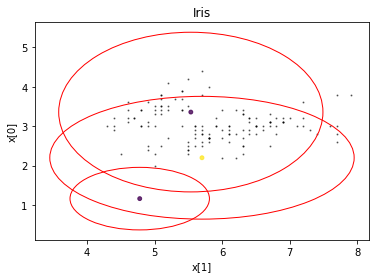

In [13]:
w = fuzz._get_layer_weights('FuzzyRules')


plt.clf()
plt.title('Iris')
plt.ylabel('x[0]')
plt.xlabel('x[1]')
plt.scatter([a[0] for a in X_train], [a[1] for a in X_train], c=(0,0,0), alpha=0.5,s=1)
for i in range(0,fuzz.neurons):
    ellipse = Ellipse((w[0][0][i], w[0][1][i]), w[1][0][i],w[1][1][i], color='r', fill=False)
    ax = plt.gca()
    ax.add_patch(ellipse)

plt.scatter(w[0][0], w[0][1], c=(1,0,0), alpha=0.8,s=15)
plt.show()